In [4]:
import sys
sys.path.append('../src')

In [5]:
import mesa
import seaborn as sns
import numpy as np
import pandas as pd

from boltzman import MoneyAgent, MoneyModel

In [7]:
model = MoneyModel(100, 10, 10)
for i in range(20):
    model.step()


agent_wealth = model.datacollector.get_agent_vars_dataframe()
gini = model.datacollector.get_model_vars_dataframe()

display(agent_wealth)
display(gini)

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
...              ...
19   45            0
     89            0
     38            0
     54            0
     29            0

[2000 rows x 1 columns]

,Gini
0,0.0000
1,0.5014
2,0.6096
3,0.6004
4,0.6112
5,0.6418
6,0.6440
7,0.6750
8,0.6392
9,0.6216


[Text(0.5, 1.0, 'Gini Coefficient over Time'),
 Text(0, 0.5, 'Gini Coefficient')]

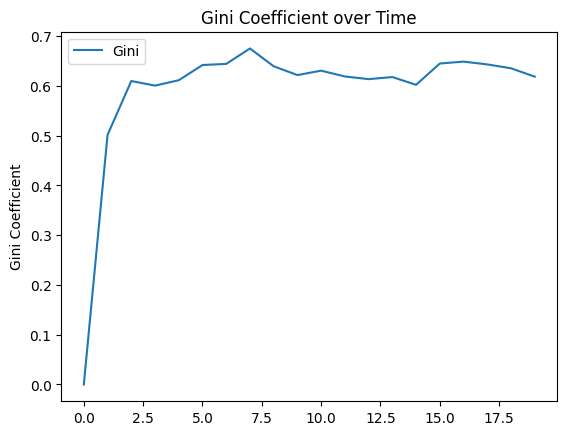

In [8]:
import seaborn as sns
g = sns.lineplot(data=gini)
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient")

In [10]:
params = {"width": 10, "height": 10, "N": range(5, 100, 5)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=7,
    max_steps=100,
    number_processes=None,
    data_collection_period=1,
    display_progress=True,
)

results_df = pd.DataFrame(results)

  0%|          | 0/133 [00:00<?, ?it/s]

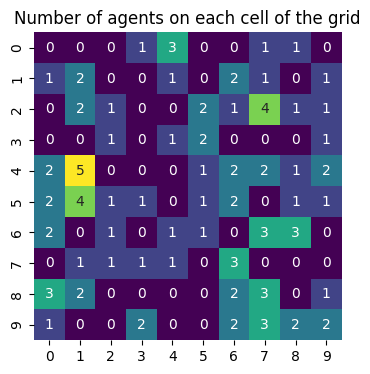

In [11]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
# Plot using seaborn, with a size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(4, 4)
g.set(title="Number of agents on each cell of the grid");

In [13]:
from mesa.experimental import JupyterViz

def agent_portrayal(agent):
    if agent.wealth > 0:
        return { "size": 50, "color": "blue" }
    else:
        return { "size": 20, "color": "red" }

model_params = {
    "N": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}


page = JupyterViz(
    MoneyModel,
    model_params,
    measures=["Gini"],
    name="Money Model",
    agent_portrayal=agent_portrayal,
)

page

Cannot show ipywidgets in text